In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
df = pd.read_csv('nigeria_houses_data.csv')

In [66]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [67]:
df.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [68]:
#df['Location'] = df['Location'].replace('Lagoss','Lagos')
#mean_value =df['Electricity (hours/day)'].mean()

In [69]:

#imputer = SimpleImputer(strategy = 'mean')
#df['Electricity (hours/day)'] = imputer.fit_transform (df[['Electricity (hours/day)']])

In [70]:
df.duplicated().sum()

10438

In [71]:
df.drop_duplicates(inplace=True)

In [72]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
24319    False
24320    False
24321    False
24322    False
24324    False
Length: 13888, dtype: bool

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'toilets'}>,
        <Axes: title={'center': 'parking_space'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

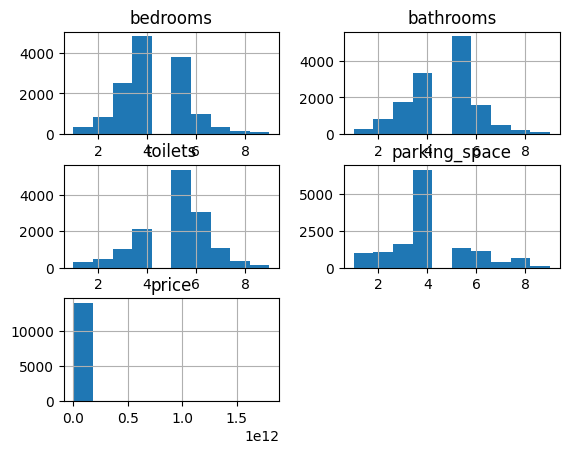

In [73]:
df.hist()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13888 entries, 0 to 24324
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       13888 non-null  float64
 1   bathrooms      13888 non-null  float64
 2   toilets        13888 non-null  float64
 3   parking_space  13888 non-null  float64
 4   title          13888 non-null  object 
 5   town           13888 non-null  object 
 6   state          13888 non-null  object 
 7   price          13888 non-null  float64
dtypes: float64(5), object(3)
memory usage: 976.5+ KB


In [75]:
df.describe()
#joy = df.select_dtypes(include=['int64','float64'], exclude='object')

,bedrooms,bathrooms,toilets,parking_space,price
count,13888.000000,13888.000000,13888.000000,13888.000000,1.388800e+04
mean,4.185412,4.516993,4.997264,4.072725,4.002137e+08
std,1.317457,1.360651,1.424560,1.638640,1.614926e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,3.000000,4.000000,4.000000,3.000000,3.800000e+07
50%,4.000000,5.000000,5.000000,4.000000,7.500000e+07
75%,5.000000,5.000000,6.000000,5.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [76]:
df.shape 

#sns.boxplot(joy)
#plt.xticks(rotation = 45)

(13888, 8)

In [77]:
#sns.boxplot('Size (sqm)')

In [78]:
# from  sklearn.dummy import DummyRegressor
# from  sklearn.model_selection import train_test_split
from  sklearn.metrics import mean_squared_error, r2_score

In [79]:
# dr = DummyRegressor()

In [80]:
# en = OneHotEncoder(sparse_output = False)
# cat = df.select_dtypes(include=['object'], exclude= ['int64','float64'])

In [81]:
df.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price'],
      dtype='object')

In [82]:
# emcoded = en.fit_transform(df[['Location', 'Property Type']])

In [83]:
 # feature_names = en.get_feature_names_out(['Location', 'Property Type'])

In [84]:
# encoded_df = pd.DataFrame(emcoded,columns=feature_names)

In [85]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [86]:
# df = df.drop(['Location', 'Property Type'],axis=1)

In [87]:
# df1 = pd.concat([df, encoded_df],axis=1)

In [88]:

#df.rename(columns={'Price (₦)':'price'}, inplace = True)

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [90]:
x = df.drop(['price'],axis=1)
y = df['price']

In [91]:
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size= 0.2, random_state= 123)

In [108]:
print(sorted(df['town'].unique()))

['Aba', 'Abeokuta North', 'Abeokuta South', 'Abraka', 'Ado-Ekiti', 'Ado-Odo/Ota', 'Afijio', 'Agbara', 'Agbara-Igbesa', 'Agege', 'Ajah', 'Akinyele', 'Akure', 'Alimosho', 'Amuwo Odofin', 'Aniocha South', 'Apapa', 'Apo', 'Arepo', 'Asaba', 'Asokoro District', 'Ayobo', 'Badagry', 'Bwari', 'Calabar', 'Central Business District', 'Chikun', 'Dakibiyu', 'Dakwo', 'Danja', 'Dape', 'Dei-Dei', 'Dekina', 'Diplomatic Zones', 'Duboyi', 'Durumi', 'Dutse', 'Ede South', 'Egbe', 'Egbeda', 'Egor', 'Ejigbo', 'Eket', 'Eko Atlantic City', 'Eleme', 'Enugu', 'Epe', 'Ethiope West', 'Ewekoro', 'Gaduwa', 'Galadimawa', 'Garki', 'Gbagada', 'Gudu', 'Guzamala', 'Guzape District', 'Gwagwalada', 'Gwarinpa', 'Ibadan', 'Ibadan North', 'Ibadan North-East', 'Ibadan North-West', 'Ibadan South-West', 'Ibafo', 'Ibarapa North', 'Ibeju', 'Ibeju Lekki', 'Idimu', 'Ido', 'Idu Industrial', 'Ifako-Ijaiye', 'Ifo', 'Ijaiye', 'Ijebu Ode', 'Ijede', 'Ijesha', 'Ijoko', 'Ikeja', 'Ikorodu', 'Ikot Ekpene', 'Ikotun', 'Ikoyi', 'Ikpoba Okha', 'I

In [93]:
numerical_features = ['bedrooms', 'bathrooms', 'toilets', 'parking_space']
numerical_transformer = Pipeline ([ 
    ('scaler', StandardScaler())
])
#('en' ,OneHotEncoder(sparse_output = False)), ('model', DummyRegressor( ))


In [94]:
categorical_features = ['title', 'town','state',]
categorical_transformer =  OneHotEncoder(handle_unknown='ignore')

# combine the preprocessing stage with column transformer
preprocessor = ColumnTransformer([
('num', numerical_transformer, numerical_features),
('cat', categorical_transformer, categorical_features , )
])

In [95]:
preprocessor = ColumnTransformer([
('num', numerical_transformer, numerical_features),
('cat', categorical_transformer, categorical_features , )
])

In [96]:
# final pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor(n_jobs=-1, n_neighbors=9, weights='distance'))

])

In [97]:
# train pipeline
model_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'toilets',
                                                   'parking_space']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['title', 'town',
                                                   'state'])])),
                ('model',
                 KNeighborsRegressor(n_jobs=-1, n_neighbors=9,
                                     weights='distance'))])

In [98]:
x_train.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state
4667,2.0,2.0,2.0,1.0,Detached Bungalow,Surulere,Lagos
20640,4.0,4.0,5.0,4.0,Detached Duplex,Ikeja,Lagos
6716,3.0,4.0,4.0,2.0,Terraced Duplexes,Lekki,Lagos
13445,5.0,5.0,6.0,5.0,Detached Duplex,Ojodu,Lagos
1930,5.0,5.0,6.0,4.0,Detached Duplex,Lokogoma District,Abuja


In [99]:
xcan = preprocessor.transform(x_train)
print(xcan)

  (0, 0)	-1.6594039443142217
  (0, 1)	-1.8506652456834924
  (0, 2)	-2.1002391131078477
  (0, 3)	-1.8723711772334597
  (0, 5)	1.0
  (0, 175)	1.0
  (0, 209)	1.0
  (1, 0)	-0.1440350620742906
  (1, 1)	-0.38276413341508386
  (1, 2)	0.000756434040377456
  (1, 3)	-0.04082915459996075
  (1, 6)	1.0
  (1, 85)	1.0
  (1, 209)	1.0
  (2, 0)	-0.9017195031942561
  (2, 1)	-0.38276413341508386
  (2, 2)	-0.6995754150090309
  (2, 3)	-1.26185716968896
  (2, 10)	1.0
  (2, 129)	1.0
  (2, 209)	1.0
  (3, 0)	0.613649379045675
  (3, 1)	0.3511864227191205
  (3, 2)	0.7010882830897858
  (3, 3)	0.5696848529445389
  :	:
  (11106, 3)	-0.04082915459996075
  (11106, 6)	1.0
  (11106, 85)	1.0
  (11106, 209)	1.0
  (11107, 0)	0.613649379045675
  (11107, 1)	-0.38276413341508386
  (11107, 2)	0.000756434040377456
  (11107, 3)	1.1801988604890385
  (11107, 5)	1.0
  (11107, 66)	1.0
  (11107, 214)	1.0
  (11108, 0)	0.613649379045675
  (11108, 1)	1.0851369788533247
  (11108, 2)	0.7010882830897858
  (11108, 3)	2.401226875578038
  (11

In [100]:
y_pred = model_pipeline.predict(x_test)

In [101]:
print(y_train.describe())
print(y_train.value_counts())

count    1.111000e+04
mean     4.469848e+08
std      1.803196e+10
min      9.000000e+04
25%      3.750000e+07
50%      7.500000e+07
75%      1.600000e+08
max      1.800000e+12
Name: price, dtype: float64
price
3.500000e+07    328
6.500000e+07    323
4.500000e+07    295
7.000000e+07    276
7.500000e+07    274
               ... 
8.000000e+07      1
4.375000e+07      1
1.950000e+09      1
5.800000e+06      1
1.760210e+08      1
Name: count, Length: 505, dtype: int64


In [102]:

print(y_pred[:10])

[3.83333333e+07 4.00000000e+08 6.02222222e+07 1.44444444e+08
 1.70000000e+07 4.96187353e+07 7.50000000e+07 3.30042930e+07
 5.50000000e+07 1.20000000e+08]


In [103]:
 import joblib

In [ ]:
joblib.dump(model_pipeline, 'property_prices_ .joblib')

['property_prices_ .joblib']